## Recurrent Neural Network

### Data Preprocessing

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

#### Creating DS for 120 previous stock prices in time and 1 output stock price

In [46]:
X_train = []
y_train = []
for i in range(120, 1258):
  X_train.append(training_set_scaled[i-120:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#### Reshaping to add third dimension i.e. indicators

In [47]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building and Training RNN

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [49]:
regressor = Sequential()

### Adding first LSTM layer and some dropout regularisation

In [50]:
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding second LSTM layer and some Dropout regularisation

In [51]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

### Adding third LSTM layer and some Dropout regularisation

In [52]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding fourth LSTM layer and some Dropout regularisation

In [53]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [54]:
regressor.add(Dense(units = 1))

### Compiling RNN

In [55]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting RNN to the Training set

In [56]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 10s 104ms/step - loss: 0.0399
Epoch 2/100
36/36 [==============================] - 4s 105ms/step - loss: 0.0069
Epoch 3/100
36/36 [==============================] - 4s 106ms/step - loss: 0.0056
Epoch 4/100
36/36 [==============================] - 4s 101ms/step - loss: 0.0060
Epoch 5/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0052
Epoch 6/100
36/36 [==============================] - 4s 103ms/step - loss: 0.0052
Epoch 7/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0050
Epoch 8/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0045
Epoch 9/100
36/36 [==============================] - 4s 103ms/step - loss: 0.0044
Epoch 10/100
36/36 [==============================] - 4s 103ms/step - loss: 0.0044
Epoch 11/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0050
Epoch 12/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0046
Epoch 13/100

### Making the predictions and visualising the results

### Getting real stock price of 2017

In [57]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

Getting the predicted stock price of 2017

In [58]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)


# stock prices of 3 months prior
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values

inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
  X_test.append(inputs[i-120:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


### Visualizing

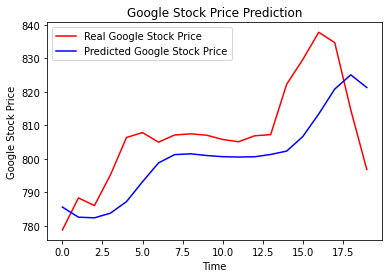

In [59]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


### Metriculation

In [60]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

13.215197603809099